# Examples related to LLS fitting

In [21]:
%matplotlib notebook

In [20]:
# imports
from pyigm.abssys import lls_fitting as pyi_llf

## Maximum Likelihood analysis of a Lyman limit

### LLS dict

In [8]:
lls_dict = dict(z=0.41117, spec_fil='FBQS.J1252+2913_hsla.fits', 
               NHI_mnx=[17., 19.],
               neval=100,
               windows=[[1265., 1283.]],  # Wavelengths for LL analysis
               )

#### Continuum parameters

In [9]:
lls_dict['analy_type'] = 'Fit_Conti'
# Continuum
lls_dict['cdict'] = dict(type='Fit_line', 
                         C1_range=[0., 1e-17],  # Allowed range to fit for slope
                         C0_range=[3.e-16, 5e-15],   # Range range to fit for normalization
                         analy=[[1303.3, 1303.96], # Windows for fitting continuum
                       [1300.4, 1301.18],
                       [1298.0, 1299.2], 
                       [1296.2, 1296.9]])

### Run

In [12]:
reload(pyi_llf)
NHI_eval, C0_val, C1_val, lnL3D = pyi_llf.maxlik_fitlinearc(lls_dict)

### Analyze the Likelihood grid

In [17]:
reload(pyi_llf)
pyi_llf.analyze_lnl(lls_dict, (NHI_eval, C0_val, C1_val), lnL3D)

#### NHI results

In [18]:
lls_dict['fit_NHI']

[18.01010101010101, 18.01010101010101, 18.777777777777779]

#### Continuum results

In [19]:
lls_dict['cdict']['fit_val']

[[1.3551020408163264e-15, 1.2591836734693876e-15, 1.3551020408163264e-15],
 [2.0408163265306125e-19, 6.122448979591838e-19, 4.693877551020409e-18]]

### Plots

#### Contour

<IPython.core.display.Javascript object>


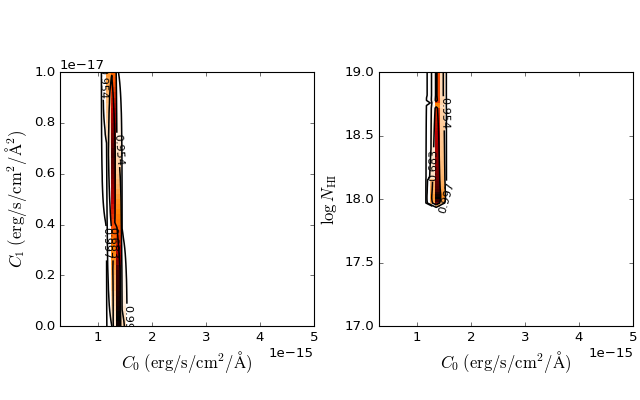

/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1215: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1220: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


In [23]:
reload(pyi_llf)
pyi_llf.plot_contours(lnL3D, (NHI_eval, C0_val, C1_val))

#### Data

<IPython.core.display.Javascript object>


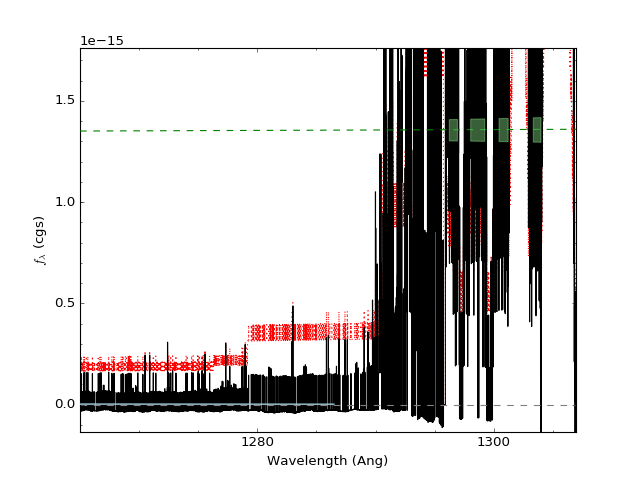

In [30]:
reload(pyi_llf)
plt.clf()
ax = plt.gca()
pyi_llf.plot_NHI_model(lls_dict, ax)
plt.show()